<a href="https://colab.research.google.com/github/sakib927/GRIP-JUNE-22-DATA-SCIENCE-/blob/main/Task_5_Exploratory_Data_Analysis_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Sparks Foundation

GRIP JUNE 2022

Name: SAKIB ALI

Data Science & Business Analytics Intern

Task 5 : Exploratory Data Analysis - Sports

Task Description: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

 As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

Importing Library 

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Dataset

In [ ]:
matches_data = pd.read_csv("/content/drive/MyDrive/matches.csv")
score_data = pd.read_csv("/content/drive/MyDrive/deliveries.csv")

In [ ]:
matches_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
score_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# Data info
print(matches_data.info())
print(score_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
matches_data["umpire3"].isnull().sum()

637

In [ ]:
# Data description 
matches_data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
# To see how many seasons we have got in the dataset
matches_data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Checking which team won by max runs

In [ ]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [ ]:
matches_data.iloc[matches_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

Checking which team won by max wickets

In [ ]:
matches_data.iloc[matches_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

Checking which team won by minimum runs

In [ ]:
matches_data.iloc[matches_data[matches_data['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

Checking which team won by Minimum Wickets

In [ ]:
matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

In [ ]:
matches_data.iloc[matches_data[matches_data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

Conclusion:-

Mumbai Indians is the team which won by maximum and minimum runs

Kolkata Knight Riders is the team which won by maximum and minimum wickets

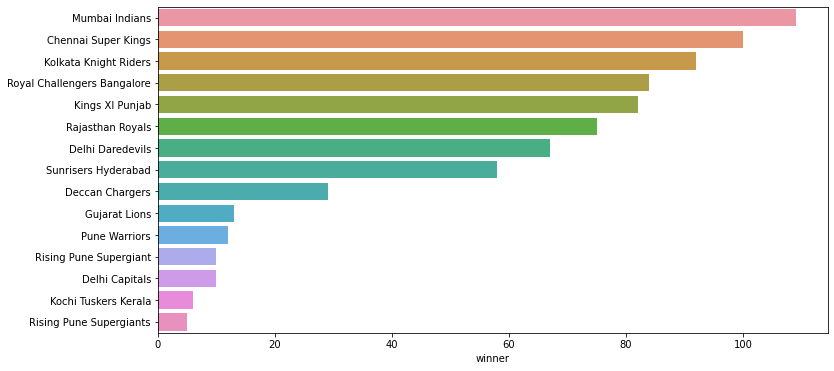

In [ ]:
plt.figure(figsize=(12,6))
data = matches_data.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')
plt.show()

The above graph shows no of matches played by each team 

Top player of the match

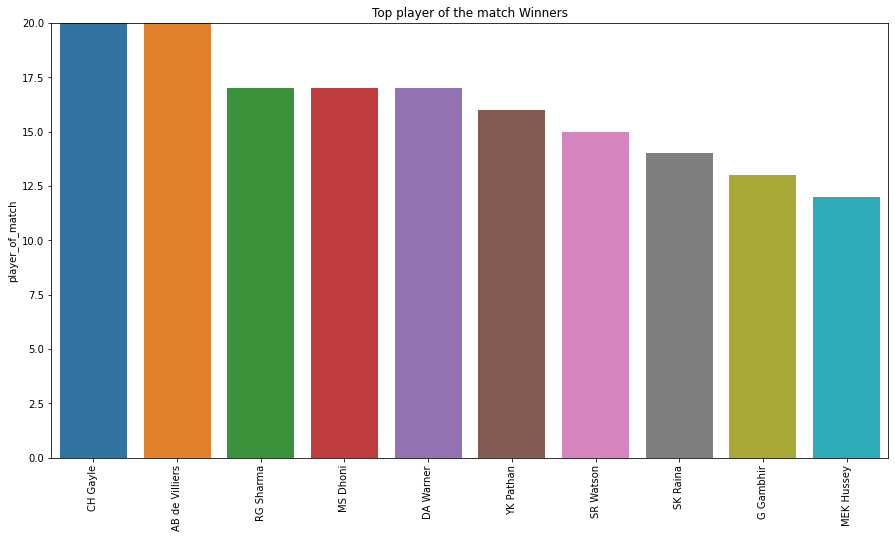

In [ ]:
top_players = matches_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots(figsize=(15,8))
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

Gayle and Ab de villies are the top players

Matches Played in the venue 

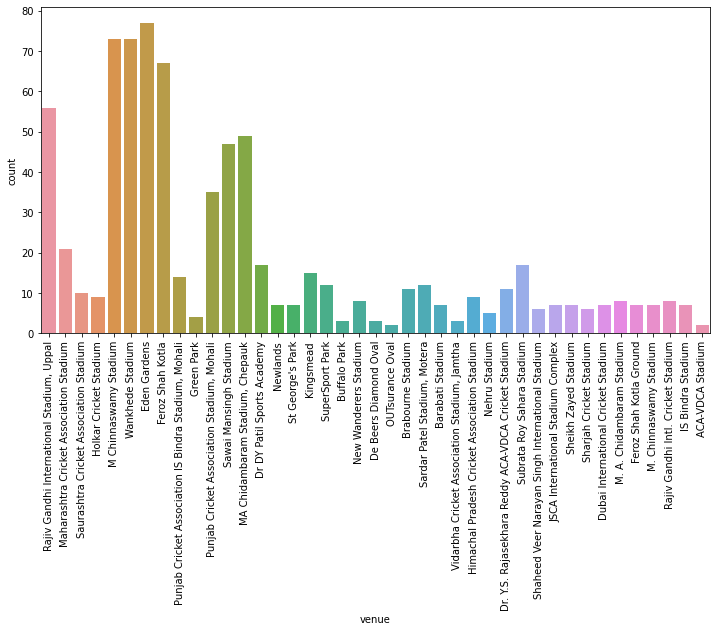

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=matches_data)
plt.xticks(rotation='vertical')
plt.show()

"Eden Gardens" has the most number of matchs played on its ground

Now lets see the winner of each season

In [ ]:
champ = matches_data.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


Now lets see the top Umpire

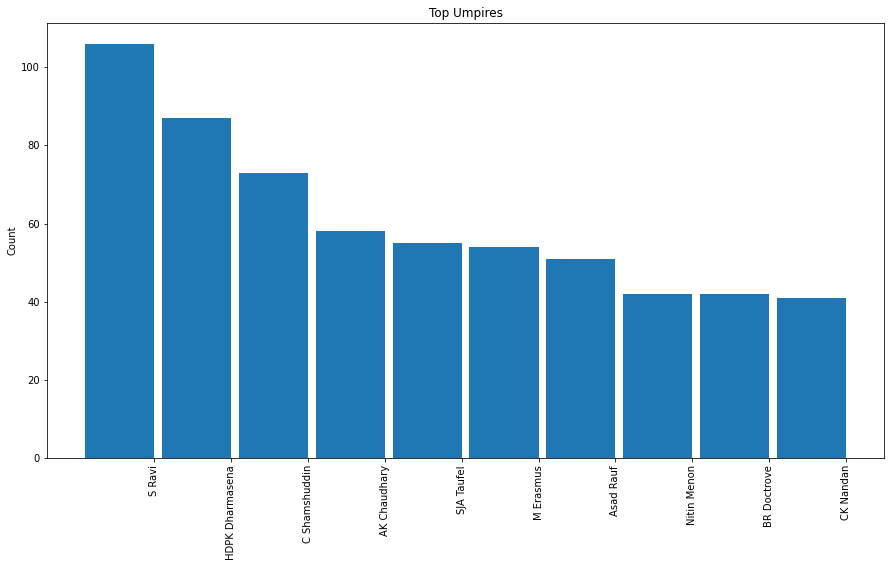

In [ ]:
temp_df = pd.melt(matches_data, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")

plt.show()

The most umpiring is done by S Ravi 

Analysing Score Data

Batsman Analysis 

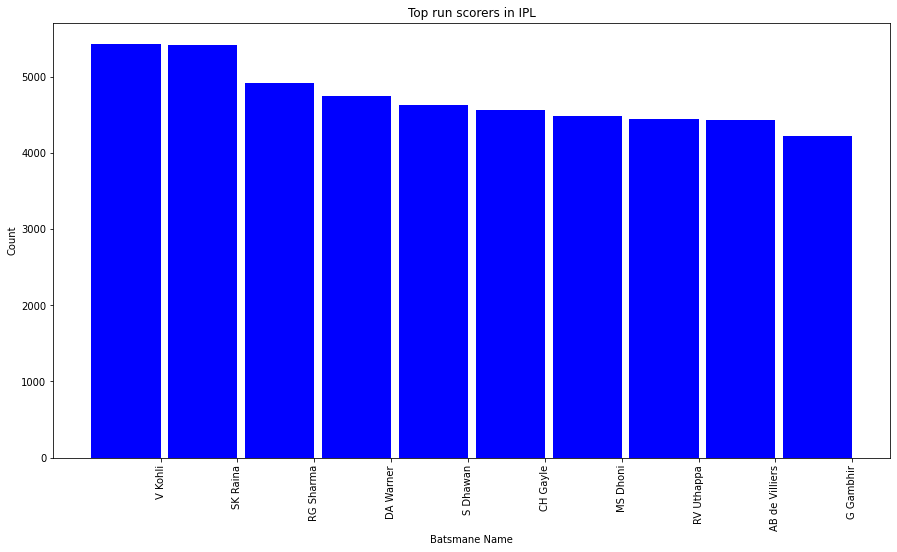

In [ ]:
temp_data = score_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_data = temp_data.iloc[:10,:]

labels = np.array(temp_data['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_data['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')

plt.show()

Most run are made by V Kohli

Bowler Analysis

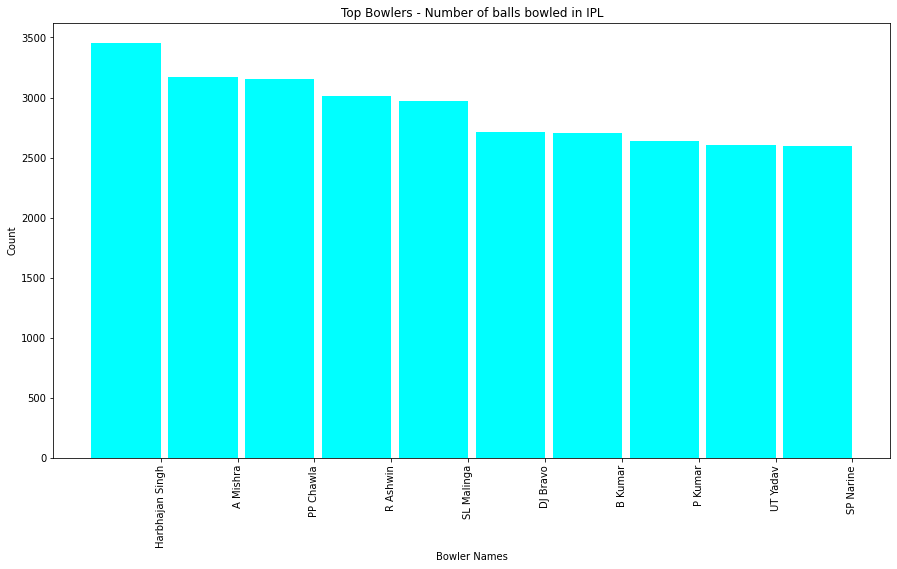

In [ ]:
temp_df = score_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='cyan')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')

plt.show()

Harbhajan Singh has bowled the most times